Importing Necessary Modules

In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import tensorflow as tf



Loading the Datasets

In [21]:
test_set = pd.read_csv('imageRecognition/mnist_test.csv', index_col=None)
train_set = pd.read_csv('imageRecognition/mnist_train.csv', index_col=None) 

Familiarizing with the Datasets

In [22]:
print(test_set.head(1).values)

[[  7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254
  254 254 241 198 198 198 198 198 198 

In [23]:
print(train_set.head(1).values)

[[  5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166
  255 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94
  154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0
    0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93
   82  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219
  253 253 253 253 253 198 182 247 241 

In [26]:
def convert_to_grayscale(dataset):
    # Extract the pixel values from the dataset
    pixel_columns = dataset.columns[1:]  # Assuming the pixel values start from the second column
    pixel_values = dataset[pixel_columns].values

    # Reshape pixel values into 28x28 images
    images = pixel_values.reshape(-1, 28, 28)

    # Convert the list of grayscale images to a NumPy array
    grayscale_images = np.array(images)
    return grayscale_images


Spliting Images and Labels in Train and Test Sets

In [27]:
train_x = np.log1p(convert_to_grayscale(train_set))
test_x =  np.log1p(convert_to_grayscale(test_set))
train_y = train_set['label']
test_y = test_set['label']

Visualization of Images with Labels

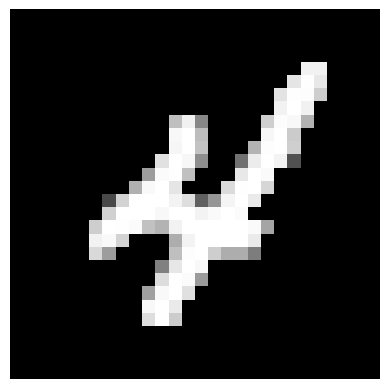

9


In [28]:
image_pixel_values = train_x[9, :, :] 

# Reshape the pixel values into a 28x28 array
image_array = image_pixel_values.reshape(28, 28)

# Display the image using plt.imread
plt.imshow(image_array, cmap='gray') 
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(test_set.iloc[9,0])

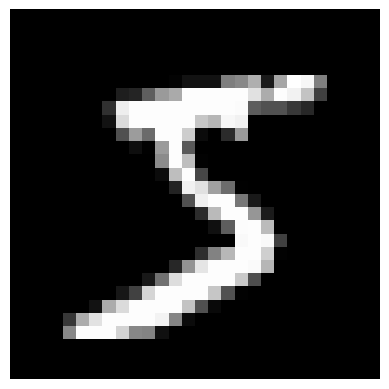

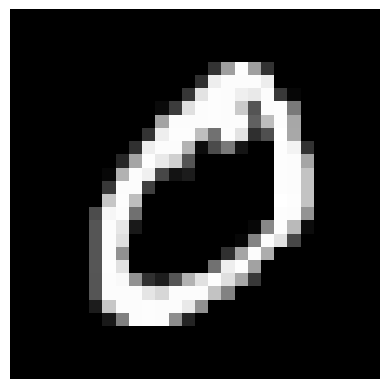

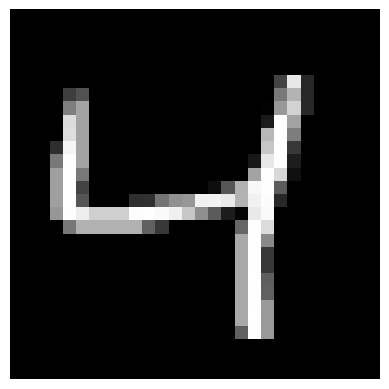

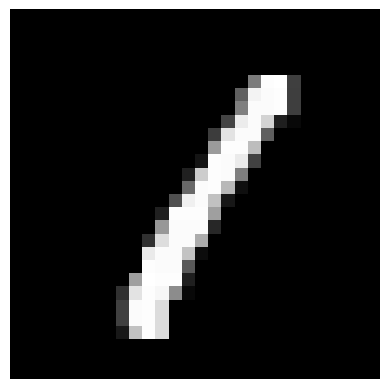

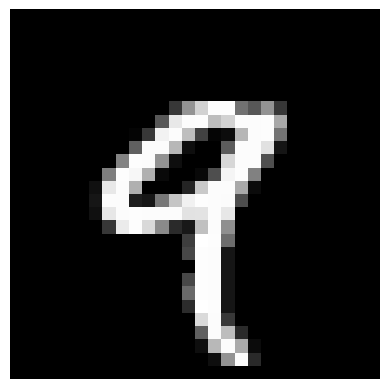

In [29]:
for i in range(5):
    transformed_img = train_x[i]
    original_img = np.expm1(transformed_img)
    plt.imshow(original_img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()

In [30]:
for i in range(5):
    transformed_img = train_x[i]
    original_img = np.expm1(transformed_img)
    img_mean = original_img.mean()
    img_min = original_img.min()
    img_max = original_img.max()
    print(f"Image {i+1} - Mean: {img_mean:.2f}, Min: {img_min}, Max: {img_max}")

Image 1 - Mean: 35.11, Min: 0.0, Max: 254.99999999999994
Image 2 - Mean: 39.66, Min: 0.0, Max: 254.99999999999994
Image 3 - Mean: 24.80, Min: 0.0, Max: 254.99999999999994
Image 4 - Mean: 21.86, Min: 0.0, Max: 254.99999999999994
Image 5 - Mean: 29.61, Min: 0.0, Max: 254.99999999999994


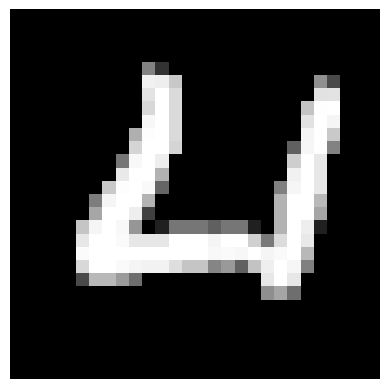

4


In [31]:
# Extract the pixel values for the chosen image
image_pixel_values = test_x[33,:,:] # Columns 1 to end contain pixel values

# Reshape the pixel values into a 28x28 array
image_array = np.array(image_pixel_values).reshape(28, 28)

# Display the image using plt.imread
plt.imshow(image_array, cmap='gray')  
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(test_y[33])

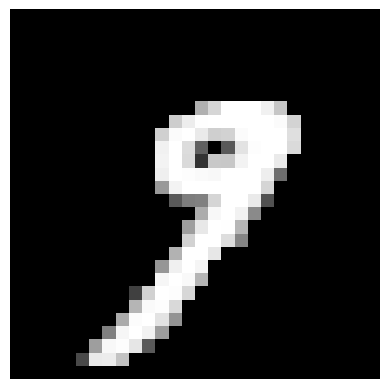

9


In [32]:
# Extract the pixel values for the chosen image
image_pixel_values = train_x[33,:,:] # Columns 1 to end contain pixel values

# Reshape the pixel values into a 28x28 array
image_array = np.array(image_pixel_values).reshape(28, 28)

# Display the image using plt.imread
plt.imshow(image_array, cmap='gray' ) 
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(train_y[33])

Skewness Detection and Solution

Initial Skewness: 2.1511040998639936
Transformed Skewness: 1.7009873377900953


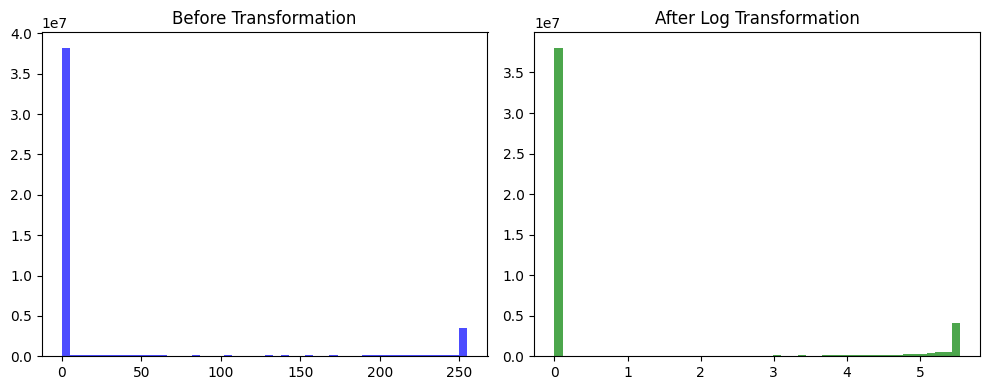

In [33]:
from scipy.stats import skew
all_pixel_values_train = np.expm1(np.array(train_x)).flatten()

# Calculate skewness before transformation
initial_skewness_train = skew(all_pixel_values_train)
print(f"Initial Skewness: {initial_skewness_train}")

# Apply logarithm transformation
transformed_pixel_values_train = np.array(train_x).flatten()

# Calculate skewness after transformation
transformed_skewness_train = skew(transformed_pixel_values_train)
print(f"Transformed Skewness: {transformed_skewness_train}")

# Plot histograms before and after transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(all_pixel_values_train, bins=50, color='blue', alpha=0.7)
plt.title('Before Transformation')
plt.subplot(1, 2, 2)
plt.hist(transformed_pixel_values_train, bins=50, color='green', alpha=0.7)
plt.title('After Log Transformation')
plt.tight_layout()
plt.show()

Initial Skewness: 2.1285586190159993
Transformed Skewness: 1.687129941766621


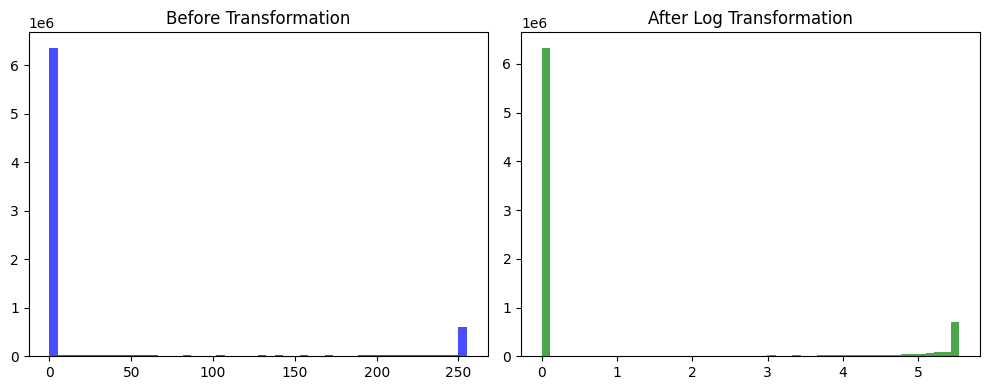

In [34]:
all_pixel_values_test = np.expm1(np.array(test_x)).flatten()

# Calculate skewness before transformation
initial_skewness_test = skew(all_pixel_values_test)
print(f"Initial Skewness: {initial_skewness_test}")

# Apply logarithm transformation
transformed_pixel_values_test = np.array(test_x).flatten()

# Calculate skewness after transformation
transformed_skewness_test = skew(transformed_pixel_values_test)
print(f"Transformed Skewness: {transformed_skewness_test}")

# Plot histograms before and after transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(all_pixel_values_test, bins=50, color='blue', alpha=0.7)
plt.title('Before Transformation')
plt.subplot(1, 2, 2)
plt.hist(transformed_pixel_values_test, bins=50, color='green', alpha=0.7)
plt.title('After Log Transformation')
plt.tight_layout()
plt.show()

Train the Model (Neural Network)

In [37]:
# Reshape the image data to include the channel dimension
train_x_reshaped = train_x.reshape(-1, 28, 28, 1)
test_x_reshaped = test_x.reshape(-1, 28, 28, 1)

# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))  # Input shape includes channel dimension

# Add convolutional layers
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output of the last convolutional layer
model.add(tf.keras.layers.Flatten())

# Add fully connected layers
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # 10 classes for digits 0-9

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_x_reshaped, train_y, epochs=10, batch_size=64, validation_data=(test_x_reshaped, test_y))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_x_reshaped, test_y)
print(f"Test accuracy: {test_acc:.2f}")


Epoch 1/10
938/938 [==============================] - 77s 78ms/step - loss: 0.1588 - accuracy: 0.9505 - val_loss: 0.0547 - val_accuracy: 0.9820
Epoch 2/10
938/938 [==============================] - 73s 78ms/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0601 - val_accuracy: 0.9814
Epoch 3/10
938/938 [==============================] - 94s 101ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.0365 - val_accuracy: 0.9879
Epoch 4/10
938/938 [==============================] - 86s 92ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0350 - val_accuracy: 0.9885
Epoch 5/10
938/938 [==============================] - 88s 93ms/step - loss: 0.0224 - accuracy: 0.9928 - val_loss: 0.0413 - val_accuracy: 0.9879
Epoch 6/10
938/938 [==============================] - 92s 98ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0318 - val_accuracy: 0.9906
Epoch 7/10
938/938 [==============================] - 136s 145ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.0396 - val_accura

Save the model

In [38]:
model.save('models/CNN.h5')

C:\Users\ammar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Use the Model

In [42]:
image = test_x[2, :, :]
real_label = test_y.iloc[2]

pred_label_model = model.predict(image.reshape(-1, 28, 28, 1))

print(f"Real Label: {real_label}")
print(f"Label Predicted by CNN: {np.argmax(pred_label_model)}")


1/1 [==============================] - 0s 106ms/step
Real Label: 1
Label Predicted by CNN: 1
